hstack(tup)
Stack arrays in sequence horizontally (column wise).

Take a sequence of arrays and stack them horizontally to make
a single array. Rebuild arrays divided by `hsplit`.

This function continues to be supported for backward compatibility, but
you should prefer ``np.concatenate`` or ``np.stack``. The ``np.stack``
function was added in NumPy 1.10.

Parameters

tup : sequence of ndarrays
    All arrays must have the same shape along all but the second axis.

Returns

stacked : ndarray
    The array formed by stacking the given arrays.
---------------------------------------------------------------
randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instea


In [15]:
#產生測試資料
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
n_train = 20 # samples for training
n_test = 200 # samples for testing
n_averages = 50 # how often to repeat classification
n_features_max = 75 # maximum number of features
step = 4 #step size for the calculation

def generate_data(n_samples,n_features):
    x,y = make_blobs(n_samples=n_samples,n_features=1,centers=[[-2],[2]])
    #add non-discriminative增加無識別力 features 
    if n_features > 1:
        x = np.hstack([x,np.random.randn(n_samples,n_features - 1)])
    return x , y
x,y = generate_data(10,5)

import pandas as pd
pd.set_option('precision',2)
df=pd.DataFrame(np.hstack([y.reshape(10,1),x]))
df.columns = ['y','x0','x1','x2','x2','x4']
print(df)

     y    x0    x1    x2    x2    x4
0  0.0 -2.02  0.18 -0.76 -1.10  0.27
1  1.0  2.45 -1.20  0.04  0.52 -2.05
2  1.0  1.41 -0.45 -1.02  0.94  2.08
3  0.0 -0.34  0.09 -0.56 -1.03  0.22
4  1.0  2.03 -1.48  0.05 -1.41 -1.50
5  0.0 -2.17 -0.60  1.12 -0.20 -0.30
6  0.0 -0.51  0.02  0.59 -1.21  1.71
7  1.0  1.49  0.15 -1.45 -0.11  1.18
8  0.0 -3.44  2.38 -0.91 -0.13 -0.48
9  1.0  2.25  0.23 -0.71  0.05  0.40


我們可以看到只有X的第一行特徵資料(X0) 與目標數值 y 有一個明確的對應關係，也就是y為1時，數值較大

接下來程式碼裏有兩段迴圈，外圈改變特徵數量。
內圈則多次嘗試LDA之以求精準度。使用LinearDiscriminantAnalysis來訓練分類器，
過程中以shrinkage='auto'以及shrinkage=None來控制shrinkage之開關，
將分類器分別以clf1以及clf2儲存。之後再產生新的測試資料將準確度加入score_clf1及score_clf2裏，
離開內迴圈之後除以總數以求平均。

In [31]:
acc_clf1,acc_clf2=[],[]
n_features_range = range(1,n_features_max + 1 , step)
for n_features in n_features_range:
    score_clf1,score_clf2=0,0
    for _ in range(n_averages):
        x,y=generate_data(n_train,n_features)
        
        clf1=LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').fit(x,y)
        clf2=LinearDiscriminantAnalysis(solver='lsqr',shrinkage=None).fit(x,y)
        
        x,y = generate_data(n_test,n_features)
        score_clf1 +=clf1.score(x,y)
        score_clf2 +=clf2.score(x,y)
        
    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)


這個範例主要希望能得知shrinkage的功能，因此畫出兩條分類準確度的曲線。縱軸代表平均的分類準確度
，而橫軸代表的是features_samples_ratio

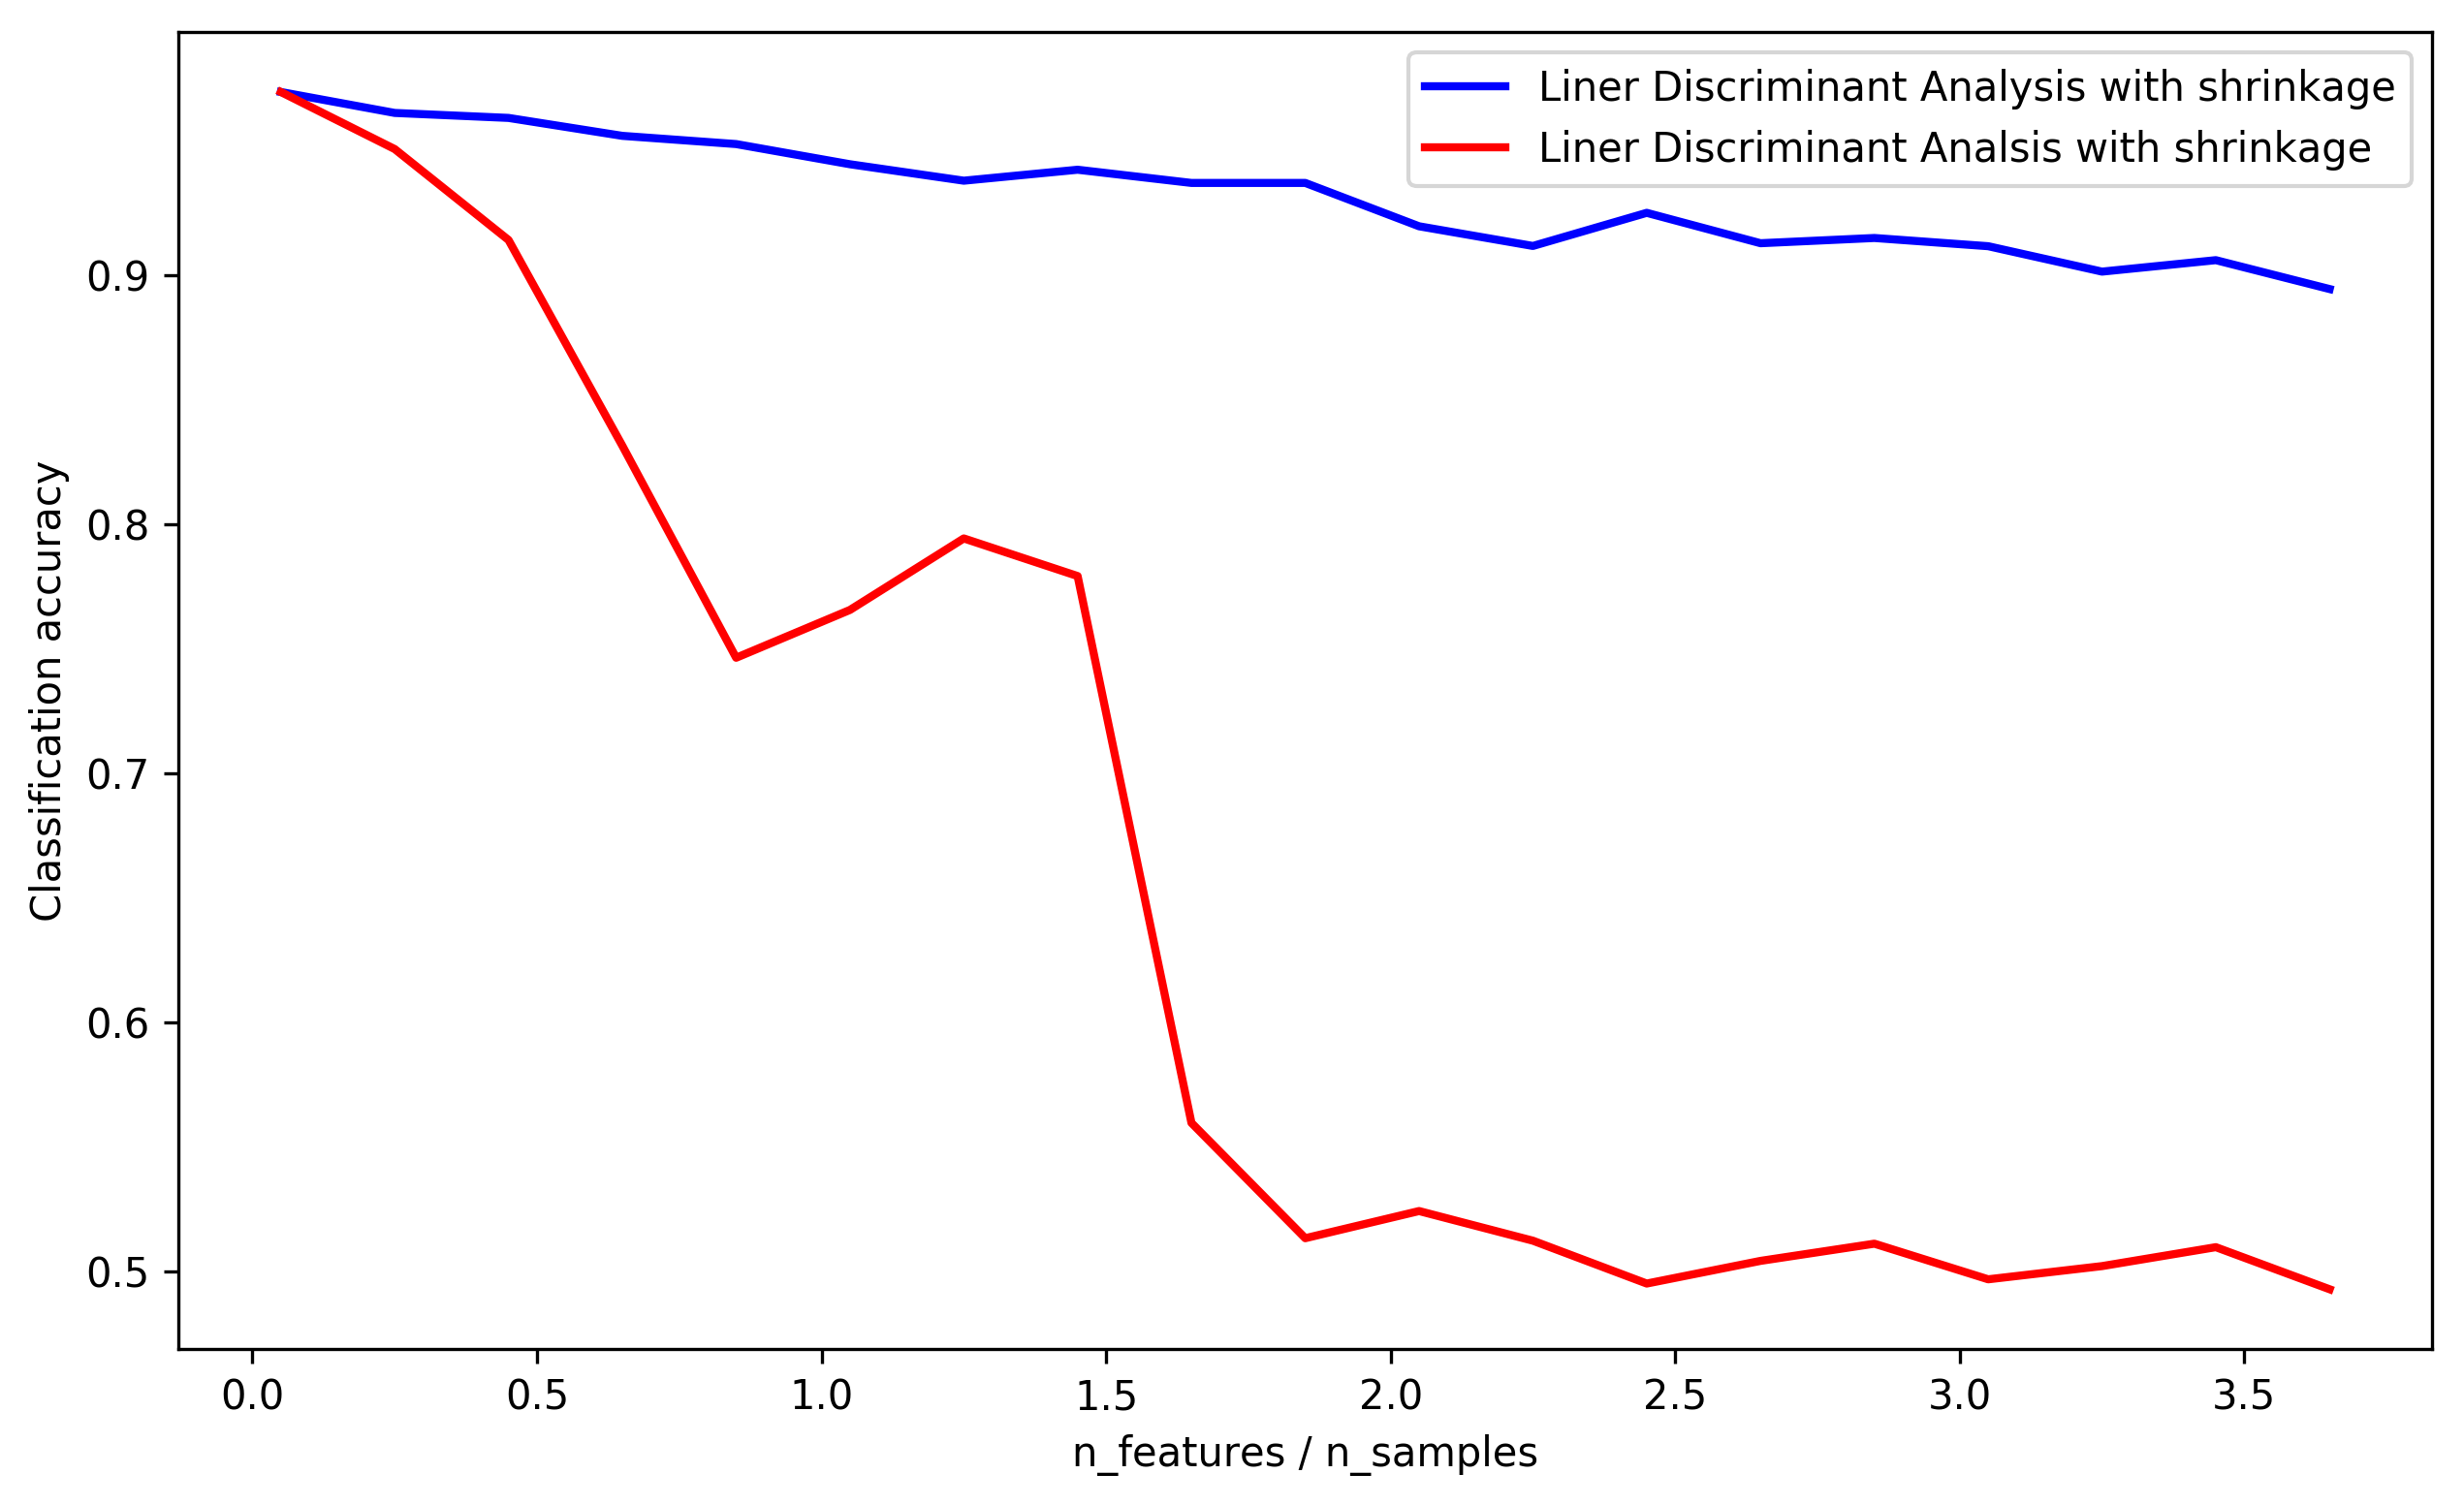

In [34]:
features_samples_ratio = np.array(n_features_range) / n_train

fig = plt.figure(figsize = (10,6), dpi = 300)

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Liner Discriminant Analysis with shrinkage" , color ='b')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Liner Discriminant Analsis with shrinkage" , color = 'r')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc = 1 , prop={'size':10})
plt.show()